In [37]:
import pandas as pd
import numpy as np
%run HelperFunctions.ipynb

df_train = pd.read_csv('../HousePricePrediction/train.csv')
df_test = pd.read_csv('../HousePricePrediction/test.csv')
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)
df = pd.concat([df_train, df_test]).reset_index(drop=True)

pd.options.display.max_rows = 5000

df.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [38]:
print(df_train.shape)
print(df_test.shape)
print(df.shape)

(1460, 80)
(1459, 79)
(2919, 80)


In [39]:
for (columnName, columnData) in df.iteritems():
    if len(df[columnName].value_counts().to_list()) == 1:
        print(columnName + " is not needed")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

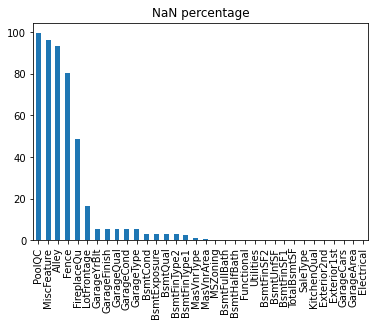

In [41]:
showNanPercentage(df)

In [51]:
df = handle_null(df)
df.drop('SalePrice', axis=1).isnull().sum().sum() #Only SalePrice column has NaN

0

In [61]:
df_train = df[:1460]
X_train = df_train.drop('SalePrice', axis=1)
Y_train = df_train[["SalePrice"]]
df_test = df[1460:]
X_test = df_test.drop('SalePrice', axis=1)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

regr = linear_model.LinearRegression()
regr.fit(X_train_poly, Y_train)

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


ValueError: could not convert string to float: 'RL'